## Data for data filling test produced using this notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('..')
from solardatatools.matrix_embedding import make_2d
from solardatatools.data_filling import zero_nighttime, interp_missing
from solardatatools.plotting import plot_2d
from solardatatools.dataio import get_pvdaq_data
from solardatatools import DataHandler
import pandas as pd

In [2]:
df1 = get_pvdaq_data(sysid=1199, year=[2015, 2016, 2017], api_key='DEMO_KEY')

CAUTION: Multiple scan rates detected!=======================] 100.0% ...queries complete in 22.6 seconds       
Scan rates (in seconds): [300, 280]
0 transitions detected.
Suggest splitting data set between:




### Fixed timezone using DataHandler

In [3]:
dh = DataHandler(df1[0])
dh.fix_dst()

In [4]:
dh.run_pipeline(power_col="dc_power")

total time: 11.99 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              2.83s
Cleaning                   4.51s
Filtering/Summarizing      4.65s
    Data quality           0.24s
    Clear day detect       0.16s
    Clipping detect        3.48s
    Capacity change detect 0.76s



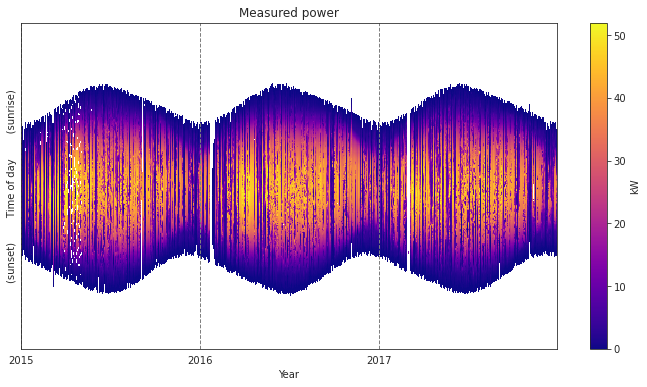

In [5]:
dh.plot_heatmap("raw");

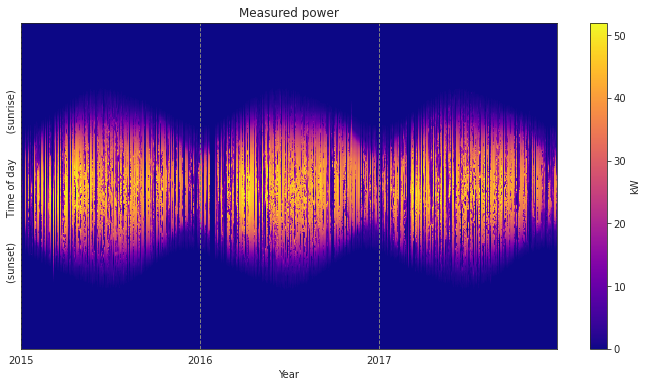

In [6]:
dh.plot_heatmap("filled");

### Data Input

In [7]:
data = dh.raw_data_matrix

### Select I/O file names

In [8]:
zero_nighttime_input_file_name = "pvdaq_2d_data_input.csv"
zero_nighttime_output_file_name = "expected_zero_nighttime_output.csv"
interp_missing_output_file_name = "expected_interp_missing_output.csv"

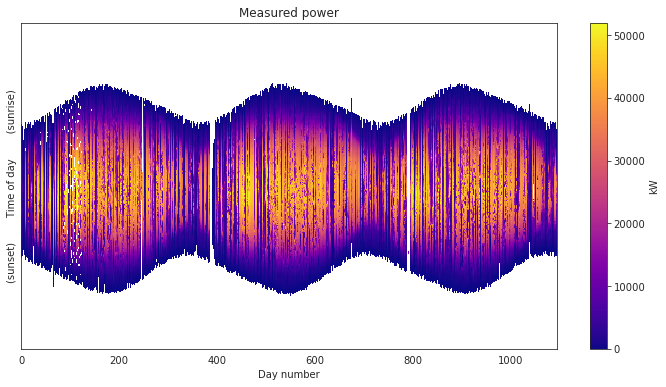

In [9]:
plot_2d(data);

### Save input data to csv

In [10]:
np.savetxt('./' + zero_nighttime_input_file_name, data, delimiter=",")

### Run functions

In [11]:
z = zero_nighttime(data)
i = interp_missing(z)

### Save expected output for zero_nighttime() to csv

In [12]:
np.savetxt('./' + zero_nighttime_output_file_name, z, delimiter=',')

### Save expected output for interp_missing() to csv

In [13]:
np.savetxt('./' + interp_missing_output_file_name, i, delimiter=',')

### Visual Test

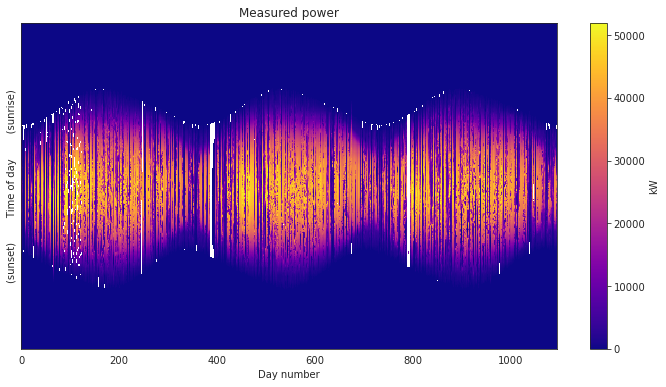

In [14]:
plot_2d(z);

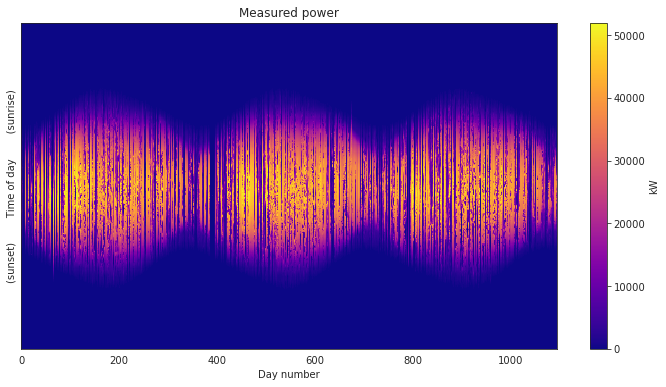

In [15]:
plot_2d(i);